In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
print('numpy: %s' % np.__version__)
# matplotlib
import matplotlib as mpl
print('matplotlib: %s' % mpl.__version__)
# pandas
import pandas as pd
print('pd: %s' % pd.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.2.2
pd: 1.0.5
statsmodels: 0.11.0
sklearn: 0.22.1


In [18]:
import seaborn as sns
import random
from matplotlib import pyplot as plt
import scipy.stats as st
from sklearn.decomposition import PCA
from numpy import median

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [19]:
# !pip install pandas_profiling

In [ ]:
# https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!conda install -c conda-forge nodejs
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [5]:
from pathlib import Path

import requests
import numpy as np
import pandas as pd

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [454]:
ds = pd.read_csv("e:/Ingek/Department/Science/Manuscripts/English_articles/KaZaKaWa_wind_energy_Applied Sciences_MDPI/EMHIRES_WIND_COUNTRY_June2019.csv", sep = ',', encoding = 'utf-8', parse_dates = ['Date'])

In [451]:
ds = pd.DataFrame(ds.groupby("Date").mean()).reset_index().sort_values('Date')

In [455]:
ds = ds.drop(columns = ['Time_step', 'Hour', 'Year', 'Month', 'Day', 'Date'])

In [456]:
ds.head()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,...,0.40628,0.26292,0.12015,0.22683,0.05124,0.2505,0.17086,0.67720,0.05715,0.268794
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,...,0.39115,0.26376,0.11985,0.25821,0.04665,0.2463,0.15909,0.66776,0.05218,0.270761
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,...,0.36163,0.26695,0.12113,0.27921,0.04543,0.2325,0.15296,0.65904,0.03905,0.265209
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,...,0.35170,0.27101,0.11858,0.33106,0.04455,0.2053,0.15328,0.58460,0.02130,0.257709
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,...,0.36168,0.28097,0.11101,0.38668,0.05438,0.2008,0.15013,0.46732,0.01029,0.247726


In [457]:
ds.shape

(262968, 36)

In [14]:
# report = ds.profile_report(sort = 'None', html = {'style':{'full_width': True}}, progress_bar = True)
# report

In [114]:
# report.to_file("e:/Ingek/Department/Science/Manuscripts/English_articles/KaZaKaWa_wind_energy_Applied Sciences_MDPI/example.html")

In [183]:
Num_gaps = 1

In [624]:
round(ds.iloc[row - k - 1 : row + k + 1, column].values.mean(), 4)

0.2805

In [967]:
# one gap !!!!!!!!!!!!!!!!!!!
# ===========================

k = 3
# err = err_back = err_forw = []
Max_observations = 100
error_df = pd.DataFrame(index = range(0, Max_observations), columns = range(0, 3), dtype = 'float')
Max_round = 4
val_new = val_old = 0

for i in range(1, Max_observations + 1): # nymber of repeates
    column = random.randint(1, ds.shape[1] - 1)
    row = random.randint(0, ds.shape[0])
    val_old = round(ds.values[row, column], Max_round)
    val_old_back = round(ds.values[row - 1, column], Max_round)
    val_old_forw = round(ds.values[row + 1, column], Max_round)
    if val_old == 0: val_old = 0.000000000001
    if row <= k + 1:
        val_new = reound(ds.iloc[row : row + k + 1, column].values.mean(), Max_round)
    elif row >= ds.shape[0] - k - 1:
        val_new = round(ds.iloc[row - k - 1 : row, column].values.mean(), Max_round)
    else:
        val_new1 = round(ds.iloc[row - k : row, column].values.mean(), Max_round)
        val_new2 = round(ds.iloc[row + k : row + k + 1, column].values.mean(), Max_round)
        val_new = round((val_new1 + val_new2) / 2, Max_round)
#     error = (abs(val_new - val_old) / val_old) * 100
#     error_back = (abs(val_old_back - val_old) / val_old) * 100
#     error_forw = (abs(val_old_forw - val_old) / val_old) * 100
    error_df.at[i - 1, 0] = round((abs(val_new - val_old) / val_old) * 100, Max_round)
    error_df.at[i - 1, 1] = round((abs(val_old_back - val_old) / val_old) * 100, Max_round)
    error_df.at[i - 1, 2] = round((abs(val_old_forw - val_old) / val_old) * 100, Max_round)
#     err.append(error)
#     err_back.append(error_back)
#     err_forw.append(error_forw)
# print(round(np.mean(err), Max_round), round(np.mean(err_back), Max_round), round(np.mean(err_forw), Max_round))
# print(val_old_back, val_old, val_old_forw, val_new)
# print(error_df.head())
pd.DataFrame(error_df.mean()).T

,0,1,2
0,67.236963,26.781569,19.92633


In [1316]:
ds.head(15)

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,...,0.40628,0.26292,0.12015,0.22683,0.05124,0.2505,0.17086,0.67720,0.05715,0.268794
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,...,0.39115,0.26376,0.11985,0.25821,0.04665,0.2463,0.15909,0.66776,0.05218,0.270761
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,...,0.36163,0.26695,0.12113,0.27921,0.04543,0.2325,0.15296,0.65904,0.03905,0.265209
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,...,0.35170,0.27101,0.11858,0.33106,0.04455,0.2053,0.15328,0.58460,0.02130,0.257709
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,...,0.36168,0.28097,0.11101,0.38668,0.05438,0.2008,0.15013,0.46732,0.01029,0.247726
5,0.2460,0.01156,0.18337,0.27690,0.1500,0.14364,0.175,0.06833,0.14023,0.16442,...,0.34826,0.28626,0.10096,0.45780,0.06790,0.1918,0.14481,0.36383,0.00355,0.232937
6,0.2455,0.00702,0.17393,0.28258,0.1320,0.19968,0.151,0.06457,0.13984,0.16373,...,0.33833,0.28984,0.08802,0.53004,0.08022,0.1770,0.13489,0.29920,0.00142,0.215823
7,0.2525,0.00353,0.16869,0.28165,0.0935,0.19146,0.134,0.06217,0.13847,0.17770,...,0.33276,0.29176,0.08228,0.61601,0.08893,0.1528,0.12606,0.24800,0.00071,0.208897
8,0.2795,0.00187,0.16738,0.28834,0.0550,0.16862,0.139,0.04909,0.13126,0.17874,...,0.32770,0.29385,0.07560,0.67967,0.09812,0.1265,0.11668,0.18736,0.00000,0.211355
9,0.3800,0.00241,0.15451,0.28608,0.0590,0.11625,0.149,0.02613,0.11055,0.17110,...,0.31399,0.28613,0.06665,0.69595,0.10528,0.1453,0.10605,0.14089,0.00000,0.213107


In [1317]:
row = 3

print(ds.iloc[row, 0], ds.iloc[row + 1, 0], ds.iloc[row + 2, 0], ds.iloc[row + 3, 0])
print(ds.iloc[row + 4 : row + 9, 0].values)

0.26 0.253 0.246 0.2455
[0.2525 0.2795 0.38   0.4255 0.436 ]


In [976]:
ds.iloc[4, 1], ds.iloc[5, 1], ds.iloc[6, 1]

(0.0178, 0.011559999999999999, 0.00702)

In [1130]:
%%time
# two gaps !!!!!!!!!!!!!!!!!!!
# ===========================

k = 1
# err = err_back = err_forw = []
Max_observations = 100
error_df = pd.DataFrame(index = range(0, Max_observations), columns = range(0, 3), dtype = 'float')
Max_round = 4
val_new = val_old = 0

for i in range(1, Max_observations + 1): # number of observation repeates
    column = random.randint(1, ds.shape[1] - 1)
    row = random.randint(0, ds.shape[0])
    val_old_1 = round(ds.values[row, column], Max_round) # first gap
    val_old_2 = round(ds.values[row + 1, column], Max_round) # second gap
    val_old_back = round(ds.values[row - 1, column], Max_round)
    val_old_forw = round(ds.values[row + 2, column], Max_round)
    if val_old_1 == 0 : val_old_1 = 0.000000000001
    if val_old_2 == 0 : val_old_2 = 0.000000000001
    if row <= k + 1:
        val_new = reound(ds.iloc[row : row + k + 1, column].values.mean(), Max_round)
    elif row >= ds.shape[0] - k:
        val_new = round(ds.iloc[row - 3 : row, column].values.mean(), Max_round)
    else:
        val_new_left = round(ds.iloc[row - 3 : row, column].values.mean(), Max_round)
        val_new_right = round(ds.iloc[row + 1 : row + 4, column].values.mean(), Max_round)
        
        err_my = ((abs(val_new_left - val_old_1) / val_old_1) * 100 + (abs(val_new_right - val_old_2) / val_old_2)) / 2
        err_back = ((abs(val_old_back - val_old_1) / val_old_1) * 100 + (abs(val_old_back - val_old_2) / val_old_2) * 100) /2
        err_forw = ((abs(val_old_forw - val_old_2) / val_old_2) * 100 + (abs(val_old_forw - val_old_1) / val_old_1) * 100) /2

    error_df.at[i - 1, 0] = round(err_my, Max_round)
    error_df.at[i - 1, 1] = round(err_back, Max_round)
    error_df.at[i - 1, 2] = round(err_forw, Max_round)

# print(round(np.mean(err), Max_round), round(np.mean(err_back), Max_round), round(np.mean(err_forw), Max_round))
# print(val_old_back, val_old, val_old_forw, val_new)
# print(error_df.head())
pd.DataFrame(error_df.mean()).T

Wall time: 52.6 ms


,0,1,2
0,11.479669,17.169887,24.384274


In [1301]:
%%time
# three gaps !!!!!!!!!!!!!!!!!!!
# ===========================

k = 1
# err = err_back = err_forw = []
Max_observations = 50
error_df = pd.DataFrame(index = range(0, Max_observations), columns = range(0, 3), dtype = 'float')
Max_round = 4
val_new = val_old = 0

for i in range(1, Max_observations + 1): # number of observation repeates
    column = random.randint(1, ds.shape[1] - 1)
    row = random.randint(0, ds.shape[0])
    val_old_1 = round(ds.values[row, column], Max_round) # first gap
    val_old_2 = round(ds.values[row + 1, column], Max_round) # second gap
    val_old_3 = round(ds.values[row + 2, column], Max_round) # third gap
    
    val_old_back = round(ds.values[row - 1, column], Max_round)
    val_old_forw = round(ds.values[row + 3, column], Max_round)
    if val_old_1 == 0 : val_old_1 = 0.000000000001
    if val_old_2 == 0 : val_old_2 = 0.000000000001
    if val_old_3 == 0 : val_old_3 = 0.000000000001
    if row <= k + 1:
        val_new = round(ds.iloc[row : row + k + 1, column].values.mean(), Max_round)
    elif row >= ds.shape[0] - k:
        val_new = round(ds.iloc[row - 3 : row, column].values.mean(), Max_round)
    else:
        val_new_left = round(ds.iloc[row - 3 : row, column].values.mean(), Max_round) 
        val_new_right = round(ds.iloc[row + 2 : row + 5, column].values.mean(), Max_round)
        val_new_middle = (val_new_left + val_new_right) / 2
        
        err_my = ((abs(val_new_left - val_old_1) / val_old_1) * 100 + 
                  (abs(val_new_middle - val_old_2) / val_old_2) * 100 + 
                  (abs(val_new_right - val_old_3) / val_old_3) * 100) / 3
        err_back = ((abs(val_old_back - val_old_1) / val_old_1) * 100 + 
                    (abs(val_old_back - val_old_2) / val_old_2) * 100 + 
                    (abs(val_old_back - val_old_3) / val_old_3) * 100) / 3
        err_forw = ((abs(val_old_forw - val_old_1) / val_old_1) * 100 + 
                    (abs(val_old_forw - val_old_2) / val_old_2) * 100 + 
                    (abs(val_old_forw - val_old_3) / val_old_3) * 100) / 3

    error_df.at[i - 1, 0] = round(err_my, Max_round)
    error_df.at[i - 1, 1] = round(err_back, Max_round)
    error_df.at[i - 1, 2] = round(err_forw, Max_round)

# print(round(np.mean(err), Max_round), round(np.mean(err_back), Max_round), round(np.mean(err_forw), Max_round))
# print(val_old_back, val_old, val_old_forw, val_new)
# print(error_df.head())
pd.DataFrame(error_df.mean()).T

Wall time: 26.2 ms


,0,1,2
0,25.570824,84.501526,24.961956


In [1465]:
%%time
# four gaps !!!!!!!!!!!!!!!!!!!
# ===========================

k = 1
# err = err_back = err_forw = []
Max_observations = 50
error_df = pd.DataFrame(index = range(0, Max_observations), columns = range(0, 3), dtype = 'float')
Max_round = 4
val_new = val_old = 0

for i in range(1, Max_observations + 1): # number of observation repeates
    column = random.randint(1, ds.shape[1] - 1)
    row = random.randint(0, ds.shape[0])
    val_old_1 = round(ds.values[row, column], Max_round) # first gap
    val_old_2 = round(ds.values[row + 1, column], Max_round) # second gap
    val_old_3 = round(ds.values[row + 2, column], Max_round) # third gap
    val_old_4 = round(ds.values[row + 3, column], Max_round) # fourth gap
    
    val_old_back = round(ds.values[row - 1, column], Max_round)
    val_old_forw = round(ds.values[row + 4, column], Max_round)
    if val_old_1 == 0 : val_old_1 = 0.000000000001
    if val_old_2 == 0 : val_old_2 = 0.000000000001
    if val_old_3 == 0 : val_old_3 = 0.000000000001
    if val_old_4 == 0 : val_old_4 = 0.000000000001
        
    if row <= k + 1:
        val_new = round(ds.iloc[row : row + k + 1, column].values.mean(), Max_round)
    elif row >= ds.shape[0] - k:
        val_new = round(ds.iloc[row - 3 : row, column].values.mean(), Max_round)
    else:
        # based on 5th previous
        val_new_left = round(ds.iloc[row - 5 : row, column].values.mean(), Max_round)
        
        # based on 5th next
        val_new_right = round(ds.iloc[row + 4 : row + 9, column].values.mean(), Max_round)
        
        # based on 4th previous & val_new_left
        val_new_middle_left = (val_new_left + round(ds.iloc[row - 4 : row, column].values.mean(), Max_round)) / 2
        
        # based on 4th next & val_new_right
        val_new_middle_right = (val_new_right + round(ds.iloc[row + 4 : row + 8, column].values.mean(), Max_round)) / 2
        
        err_my = ((abs(val_new_left - val_old_1) / val_old_1) * 100 + 
                  (abs(val_new_middle_left - val_old_2) / val_old_2) * 100 + 
                  (abs(val_new_middle_right - val_old_3) / val_old_3) * 100 +
                  (abs(val_new_right - val_old_4) / val_old_4) * 100) / 4
        
        err_back = ((abs(val_old_back - val_old_1) / val_old_1) * 100 + 
                    (abs(val_old_back - val_old_2) / val_old_2) * 100 + 
                    (abs(val_old_back - val_old_3) / val_old_3) * 100 +
                    (abs(val_old_back - val_old_4) / val_old_4) * 100) / 4
        
        err_forw = ((abs(val_old_forw - val_old_1) / val_old_1) * 100 + 
                    (abs(val_old_forw - val_old_2) / val_old_2) * 100 + 
                    (abs(val_old_forw - val_old_3) / val_old_3) * 100 +
                    (abs(val_old_forw - val_old_4) / val_old_4) * 100) / 4

    error_df.at[i - 1, 0] = round(err_my, Max_round)
    error_df.at[i - 1, 1] = round(err_back, Max_round)
    error_df.at[i - 1, 2] = round(err_forw, Max_round)

# print(round(np.mean(err), Max_round), round(np.mean(err_back), Max_round), round(np.mean(err_forw), Max_round))
# print(val_old_back, val_old, val_old_forw, val_new)
# print(error_df.head())
pd.DataFrame(error_df.mean()).T

Wall time: 41.7 ms


,0,1,2
0,63.33852,30.941008,32.460654


In [1615]:
%%time
# five gaps !!!!!!!!!!!!!!!!!!!
# ===========================

k = 1
# err = err_back = err_forw = []
Max_observations = 50
error_df = pd.DataFrame(index = range(0, Max_observations), columns = range(0, 3), dtype = 'float')
Max_round = 4
val_new = val_old = 0

for i in range(1, Max_observations + 1): # number of observation repeates
    column = random.randint(1, ds.shape[1] - 1)
    row = random.randint(0, ds.shape[0])
    val_old_1 = round(ds.values[row, column], Max_round) # first gap
    val_old_2 = round(ds.values[row + 1, column], Max_round) # second gap
    val_old_3 = round(ds.values[row + 2, column], Max_round) # third gap
    val_old_4 = round(ds.values[row + 3, column], Max_round) # fourth gap
    val_old_5 = round(ds.values[row + 4, column], Max_round) # fifth gap
    
    val_old_back = round(ds.values[row - 1, column], Max_round)
    val_old_forw = round(ds.values[row + 5, column], Max_round)
    if val_old_1 == 0 : val_old_1 = 0.000000000001
    if val_old_2 == 0 : val_old_2 = 0.000000000001
    if val_old_3 == 0 : val_old_3 = 0.000000000001
    if val_old_4 == 0 : val_old_4 = 0.000000000001
    if val_old_5 == 0 : val_old_5 = 0.000000000001
        
    if row <= k + 1:
        val_new = round(ds.iloc[row : row + k + 1, column].values.mean(), Max_round)
    elif row >= ds.shape[0] - k:
        val_new = round(ds.iloc[row - 3 : row, column].values.mean(), Max_round)
    else:
        # based on 5th previous
        val_new_left = round(ds.iloc[row - 5 : row, column].values.mean(), Max_round)
        
        # based on 5th next
        val_new_right = round(ds.iloc[row + 5 : row + 10, column].values.mean(), Max_round)
        
        # based on 2: val_new_left & val_new_right
        val_new_middle = (val_new_left + val_new_right) / 2
        
        # based on 2 : val_new_middle & val_new_left
        val_new_middle_left = (val_new_left + val_new_middle) / 2
        
        # based on 2 : val_new_middle & val_new_right
        val_new_middle_right = (val_new_right + val_new_middle) / 2
        
        err_my = ((abs(val_new_left - val_old_1) / val_old_1) * 100 + 
                  (abs(val_new_middle_left - val_old_2) / val_old_2) * 100 + 
                  (abs(val_new_middle - val_old_3) / val_old_3) * 100 +
                  (abs(val_new_middle_right - val_old_4) / val_old_4) * 100 +
                  (abs(val_new_right - val_old_5) / val_old_5) * 100) / 5
        
        err_back = ((abs(val_old_back - val_old_1) / val_old_1) * 100 + 
                    (abs(val_old_back - val_old_2) / val_old_2) * 100 + 
                    (abs(val_old_back - val_old_3) / val_old_3) * 100 +
                    (abs(val_old_back - val_old_4) / val_old_4) * 100 +
                    (abs(val_old_back - val_old_5) / val_old_5) * 100) / 5
        
        err_forw = ((abs(val_old_forw - val_old_1) / val_old_1) * 100 + 
                    (abs(val_old_forw - val_old_2) / val_old_2) * 100 + 
                    (abs(val_old_forw - val_old_3) / val_old_3) * 100 +
                    (abs(val_old_forw - val_old_4) / val_old_4) * 100 +
                    (abs(val_old_forw - val_old_5) / val_old_5) * 100) / 5

    error_df.at[i - 1, 0] = round(err_my, Max_round)
    error_df.at[i - 1, 1] = round(err_back, Max_round)
    error_df.at[i - 1, 2] = round(err_forw, Max_round)

# print(round(np.mean(err), Max_round), round(np.mean(err_back), Max_round), round(np.mean(err_forw), Max_round))
# print(val_old_back, val_old, val_old_forw, val_new)
# print(error_df.head())
pd.DataFrame(error_df.mean()).T

Wall time: 29 ms


,0,1,2
0,57.63195,46.502878,170.81472


In [557]:
%%time
Max_cells = 1
err = []
Max_observations = 500
val_new = 0
val_old = 0
means = pd.DataFrame(index = range(0, Max_observations), columns = range(0, Max_cells), dtype = 'float')
# err_set = np.dataframe()
for k in range (1, Max_cells + 1):    # number of used cells for val_new
    for j in range(1, Max_observations + 1): # number of observations
        for i in range(1, 2): # nymber of repeates 
            column = random.randint(1, ds.shape[1] - 1)
            row = random.randint(0, ds.shape[0])
            val_old = round(ds.values[row, column], 3)
            if val_old == 0: val_old = 0.000000000001
            if row <= k + 1:
                val_new = ds.iloc[row : row + k + 1, column].values.mean()
            elif row >= ds.shape[0] - k - 1:
                val_new = ds.iloc[row - k - 1 : row, column].values.mean()
            else:
                val_new1 = round(ds.iloc[row - k - 1 : row, column].values.mean(), Max_round)
                val_new2 = round(ds.iloc[row : row + k + 1, column].values.mean(), Max_round)
                val_new = (val_new1 + val_new2) / 2
            error = (abs(val_new - val_old) / val_old) * 100
            # err.append(error)
        means.at[j - 1, k - 1] = round(error, 3)
        if means.at[j - 1, k - 1] > 100: means.at[j - 1, k - 1] = 100
            
print(means) # val_old, val_new, 


          0
0    18.571
1     3.683
2    15.925
3     3.889
4     6.807
..      ...
495   2.799
496   6.274
497   1.136
498  54.000
499   2.333

[500 rows x 1 columns]
Wall time: 152 ms


In [558]:
means.at[3, 0]

3.889

In [508]:
np.seterr('raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [559]:
means.describe()

,0
count,500.000000
mean,14.748098
std,23.785291
min,0.000000
25%,2.244000
50%,5.886000
75%,15.017250
max,100.000000


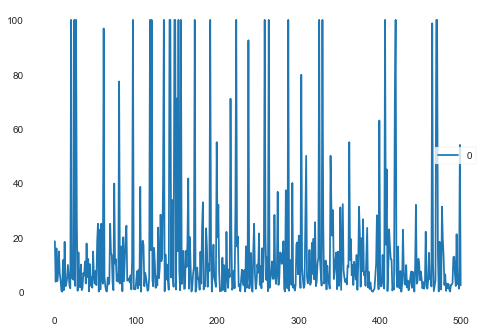

In [561]:
# g = sns.lineplot(data = np.array(err_set), palette = "tab15", linewidth = 5.5)
# g = sns.FacetGrid(np.array(means)) # , col = means[0], row = means[1])
g = sns.lineplot(data = means)